In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Data Extraction

In [6]:
df=pd.read_csv("Mcdonalds dataset.csv")

In [7]:
df.head()

,Yummy,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,VF,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [8]:
df.columns

Index(['Yummy', 'Convenient', 'Spicey', 'Fattening', 'Greasy', 'Fast', 'Cheap',
       'Tasty', 'Expensive', 'Healthy', 'Disgusting', 'Like', 'Age', 'VF',
       'Gender'],
      dtype='object')

# Data Cleaning

In [9]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [11]:
df.isna().sum()

Yummy         0
Convenient    0
Spicey        0
Fattening     0
Greasy        0
Fast          0
Cheap         0
Tasty         0
Expensive     0
Healthy       0
Disgusting    0
Like          0
Age           0
VF            0
Gender        0
dtype: int64

In [12]:
df.replace(('Yes', 'No'), (1, 0), inplace=True)

In [13]:
df.head()

,Yummy,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,VF,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['VF'])
df['VF1']=le.transform(df['VF'])
le.inverse_transform([0,1,2,3,4,5])


array(['Every three months', 'More than once a week', 'Never',
       'Once a month', 'Once a week', 'Once a year'], dtype=object)

In [16]:
df.head()

,Yummy,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,VF,Gender,VF1
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female,4
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male,3


In [17]:
df.replace(('Male', 'Female'), (1, 0), inplace=True)

In [18]:
df.head()

,Yummy,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,VF,Gender,VF1
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0,4
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1,3


In [19]:
df.replace(('I hate it!-5'), (-5), inplace=True)

In [20]:
df.head()

,Yummy,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,VF,Gender,VF1
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0,4
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1,3


In [21]:
df.replace(('I love it!+5'), (+5), inplace=True)

In [22]:
df.head()

,Yummy,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,VF,Gender,VF1
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0,4
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1,3


In [29]:
df.columns

Index(['Yummy', 'Convenient', 'Spicey', 'Fattening', 'Greasy', 'Fast', 'Cheap',
       'Tasty', 'Expensive', 'Healthy', 'Disgusting', 'Like', 'Age', 'Gender',
       'VF1'],
      dtype='object')

In [31]:
df.head()

,Yummy,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,Gender,VF1
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0,4
4,0,1,0,1,1,1,1,0,0,1,0,2,49,1,3


In [49]:
df["Like"]=df['Like'].astype(int)

In [50]:
df

,Yummy,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,Gender,VF1
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0,4
4,0,1,0,1,1,1,1,0,0,1,0,2,49,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,5
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,0,4
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,0,3
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,1,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Yummy       1453 non-null   int64
 1   Convenient  1453 non-null   int64
 2   Spicey      1453 non-null   int64
 3   Fattening   1453 non-null   int64
 4   Greasy      1453 non-null   int64
 5   Fast        1453 non-null   int64
 6   Cheap       1453 non-null   int64
 7   Tasty       1453 non-null   int64
 8   Expensive   1453 non-null   int64
 9   Healthy     1453 non-null   int64
 10  Disgusting  1453 non-null   int64
 11  Like        1453 non-null   int32
 12  Age         1453 non-null   int64
 13  Gender      1453 non-null   int64
 14  VF1         1453 non-null   int32
dtypes: int32(2), int64(13)
memory usage: 159.0 KB


# Data analysing

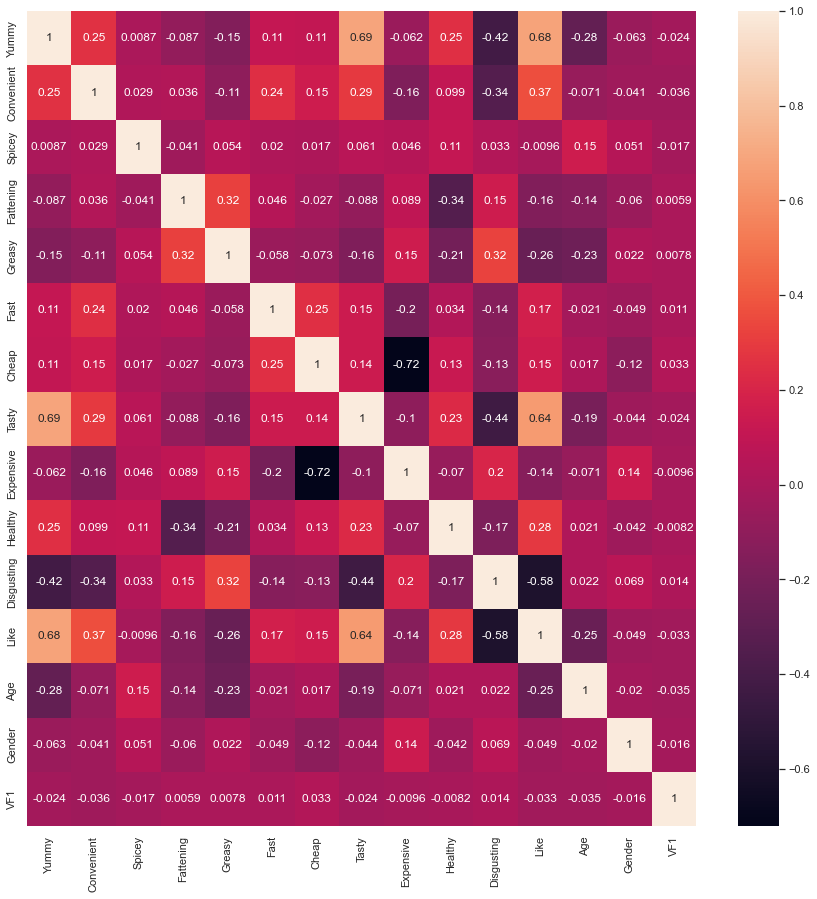

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [58]:
df.drop(columns=['Yummy'],inplace=True)

In [59]:
df

,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Healthy,Disgusting,Like,Age,Gender,VF1
0,1,0,1,0,1,1,0,0,0,-3,61,0,0
1,1,0,1,1,1,1,1,0,0,2,51,0,0
2,1,1,1,1,1,0,1,1,0,1,62,0,0
3,1,0,1,1,1,1,1,0,1,4,69,0,4
4,1,0,1,1,1,1,0,1,0,2,49,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,1,0,0,0,0,1,-5,47,1,5
1449,1,0,1,0,0,1,1,1,0,2,36,0,4
1450,1,0,1,0,1,0,1,0,0,3,52,0,3
1451,1,0,0,0,1,1,1,1,0,4,41,1,0


# Kmeans by using Elbow bethod

In [60]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(df)
    wcss.append(kmeans_pca.inertia_)

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


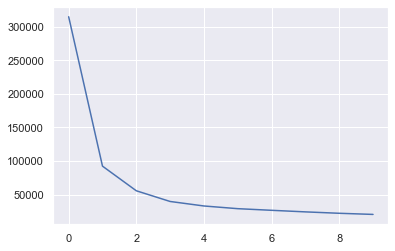

In [61]:
plt.plot(wcss)

In [84]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [85]:
 kmeans.labels_

array([1, 2, 1, ..., 1, 2, 0])

In [86]:
df['Cluster_Id'] = kmeans.labels_
df.head()

,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Healthy,Disgusting,Like,Age,Gender,VF1,Cluster_Id
0,1,0,1,0,1,1,0,0,0,-3,61,0,0,1
1,1,0,1,1,1,1,1,0,0,2,51,0,0,2
2,1,1,1,1,1,0,1,1,0,1,62,0,0,1
3,1,0,1,1,1,1,1,0,1,4,69,0,4,1
4,1,0,1,1,1,1,0,1,0,2,49,1,3,2


# Data Visualisation

<AxesSubplot:xlabel='Disgusting', ylabel='VF1'>

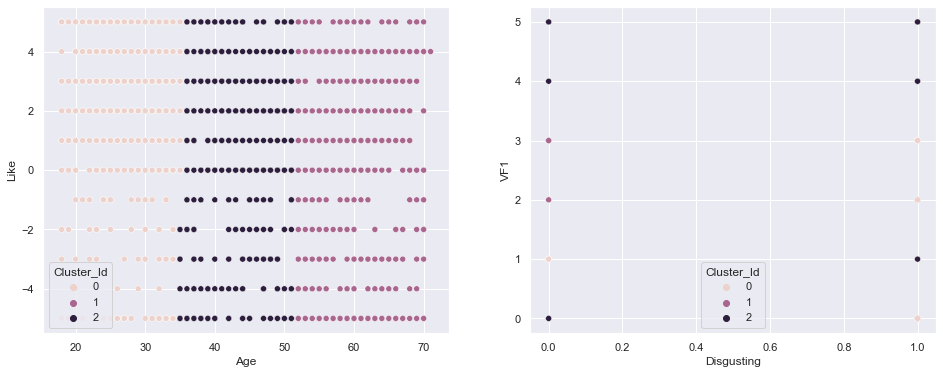

In [101]:
import seaborn as sns
_, ax = plt.subplots(1,2, figsize= (16, 6))
sns.scatterplot(x="Age", y = "Like" , hue="Cluster_Id", data=df, ax=ax[0])
sns.scatterplot(x="Disgusting", y = "VF1" , hue="Cluster_Id", data=df, ax=ax[1])

<AxesSubplot:xlabel='Gender', ylabel='Disgusting'>

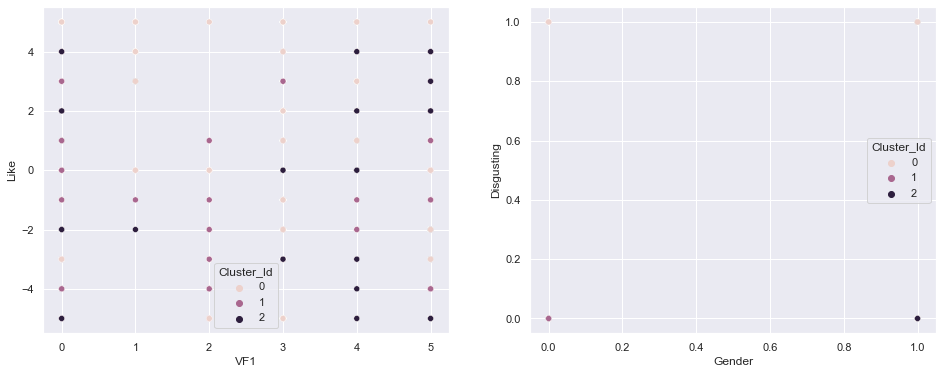

In [89]:
import seaborn as sns
_, ax = plt.subplots(1,2, figsize= (16, 6))
sns.scatterplot(x="VF1", y = "Like" , hue="Cluster_Id", data=df, ax=ax[0])
sns.scatterplot(x="Gender", y = "Disgusting" , hue="Cluster_Id", data=df, ax=ax[1])

<AxesSubplot:xlabel='Healthy', ylabel='Disgusting'>

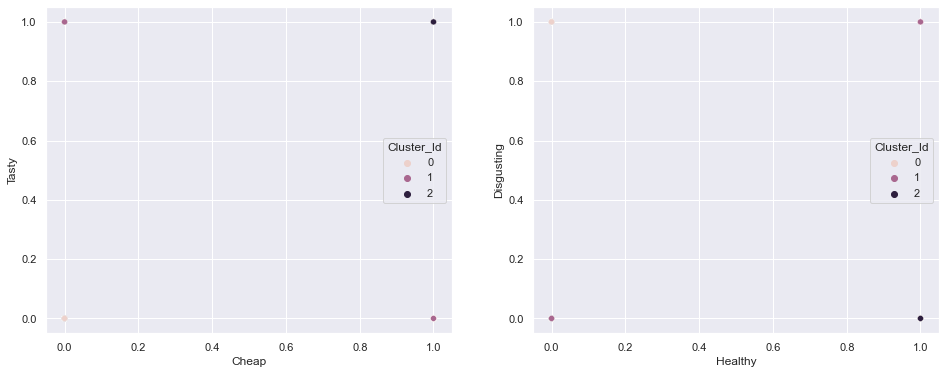

In [102]:
import seaborn as sns
_, ax = plt.subplots(1,2, figsize= (16, 6))
sns.scatterplot(x="Cheap", y = "Tasty" , hue="Cluster_Id", data=df, ax=ax[0])
sns.scatterplot(x="Healthy", y = "Disgusting" , hue="Cluster_Id", data=df, ax=ax[1])

In [90]:
le.inverse_transform([0,1,2,3,4,5])

array(['Every three months', 'More than once a week', 'Never',
       'Once a month', 'Once a week', 'Once a year'], dtype=object)

In [91]:
df1=df[df["Cluster_Id"]==0]

In [92]:
df1.describe()

,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Healthy,Disgusting,Like,Age,Gender,VF1,Cluster_Id
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.0
mean,0.935780,0.052752,0.915138,0.690367,0.915138,0.621560,0.786697,0.190367,0.206422,1.956422,27.155963,0.463303,2.763761,0.0
std,0.245426,0.223795,0.278997,0.462873,0.278997,0.485555,0.410110,0.393042,0.405202,2.687635,4.846469,0.499224,1.592127,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000,0.000000,0.0
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,23.000000,0.000000,2.000000,0.0
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,27.000000,0.000000,3.000000,0.0
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,31.000000,1.000000,4.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,35.000000,1.000000,5.000000,0.0


In [93]:
df2=df[df["Cluster_Id"]==1]

In [94]:
df2.describe()

,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Healthy,Disgusting,Like,Age,Gender,VF1,Cluster_Id
count,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.0
mean,0.890311,0.140768,0.819013,0.42596,0.914077,0.628885,0.561243,0.202925,0.243144,0.001828,59.691042,0.433272,2.526508,1.0
std,0.312788,0.348100,0.385360,0.49494,0.280507,0.483545,0.496689,0.402545,0.429374,3.161988,5.048988,0.495981,1.899665,0.0
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,52.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,55.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,59.000000,0.000000,3.000000,1.0
75%,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,64.000000,1.000000,4.000000,1.0
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,1.000000,5.000000,1.0


In [95]:
df3=df[df["Cluster_Id"]==2]

In [96]:
df3.describe()

,Convenient,Spicey,Fattening,Greasy,Fast,Cheap,Tasty,Healthy,Disgusting,Like,Age,Gender,VF1,Cluster_Id
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.0
mean,0.902128,0.076596,0.878723,0.491489,0.870213,0.542553,0.608511,0.202128,0.276596,0.585106,43.234043,0.480851,2.651064,2.0
std,0.297459,0.266232,0.326796,0.500460,0.336427,0.498717,0.488604,0.402015,0.447791,3.115439,4.929407,0.500166,1.722035,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,35.000000,0.000000,0.000000,2.0
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,39.000000,0.000000,1.000000,2.0
50%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,43.000000,0.000000,3.000000,2.0
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,48.000000,1.000000,4.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,51.000000,1.000000,5.000000,2.0
